<a href="https://colab.research.google.com/github/Iaquine/instagram-knn/blob/master/instagram_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de base do instagram usando KNN
- Base disponivel em: [Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

# Exploração dos Dados


# Importação das Bibliotecas

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, PredefinedSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import warnings

# Carregar o conjunto de dados do Instagram


In [8]:
df = pd.read_csv('top_insta_influencers_data.csv')

In [9]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [10]:
df.isna().count()

,0
rank,200
channel_info,200
influence_score,200
posts,200
followers,200
avg_likes,200
60_day_eng_rate,200
new_post_avg_like,200
total_likes,200
country,200


In [11]:
df = df.dropna()

In [12]:
# Converter a coluna 'country' em faixas numéricas baseadas em continentes
def converter_pais_para_faixa_numerica(pais):
    if pais in ['United States', 'Canada', 'Mexico']:
        return 1  # América do Norte
    elif pais in ['Brazil', 'Argentina', 'Colombia']:
        return 2  # América do Sul
    elif pais in ['Spain', 'France', 'Italy', 'Germany', 'United Kingdom']:
        return 3  # Europa
    elif pais in ['India', 'Indonesia', 'Japan', 'South Korea', 'China']:
        return 4  # Ásia
    elif pais in ['Australia', 'New Zealand']:
        return 5  # Oceania
    elif pais in ['South Africa', 'Nigeria', 'Egypt']:
        return 6  # África
    else:
        return 7  # Outros

In [13]:
df = df.assign(country_code=df['country'].apply(converter_pais_para_faixa_numerica))

In [14]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,country_code
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain,3
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States,1
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States,1
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States,1
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States,1
...,...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States,1
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France,3
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil,2
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States,1


In [15]:
# Excluir as colunas 'channel_info' e 'country'
df = df.drop(['channel_info', 'country'], axis=1)

In [16]:
df.head()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country_code
0,1,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,3
1,2,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,1
3,4,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,1
4,5,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,1
5,6,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,1


In [17]:
df.dtypes

,0
rank,int64
influence_score,int64
posts,object
followers,object
avg_likes,object
60_day_eng_rate,object
new_post_avg_like,object
total_likes,object
country_code,int64


In [18]:
# Converter as colunas para numéricas
colunas_para_converter = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

for coluna in colunas_para_converter:
    # 1. Converter a coluna para string
    df[coluna] = df[coluna].astype(str)
    # 2. Converter 'k' para '000' e 'm' para '000000'
    df[coluna] = df[coluna].str.replace('k', '000', regex=False).str.replace('m', '000000', regex=False).str.replace('m', '000000000', regex=False)
    # 3. Remover caracteres não numéricos ('%')
    df[coluna] = df[coluna].str.replace('%', '', regex=False)
    # 4. Converter a string para numérica
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    #5. Preencher com O possivel conversoes que resultam em NaN
    df = df.fillna(0)

# Imprimir os tipos de dados das colunas após a conversão
print(df.dtypes)

rank                   int64
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes          float64
country_code           int64
dtype: object


In [23]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country_code
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,96.391304,81.652174,4.032319,83.726087,219.294928,1.331522,220.255797,102.101449,2.413043
std,59.613528,8.720855,3.586775,81.033181,288.411961,1.796447,256.078540,241.116118,1.909363
min,1.000000,41.000000,0.020000,32.800000,1.000000,0.010000,0.000000,0.000000,1.000000
25%,47.250000,79.250000,1.400000,41.000000,1.800000,0.335000,3.000000,0.000000,1.000000
50%,93.000000,83.000000,2.900000,52.700000,6.000000,0.680000,132.500000,0.000000,1.000000
75%,145.250000,86.000000,6.125000,70.325000,389.525000,1.510000,340.425000,0.000000,3.000000
max,200.000000,93.000000,17.500000,475.800000,996.200000,10.250000,971.700000,969.100000,7.000000


from matplotlib import pyplot as plt
_df_0['rank'].plot(kind='hist', bins=20, title='rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['influence_score'].plot(kind='hist', bins=20, title='influence_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['posts'].plot(kind='hist', bins=20, title='posts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['followers'].plot(kind='hist', bins=20, title='followers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rank', y='influence_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='influence_score', y='posts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='posts', y='followers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='followers', y='avg_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['rank'].plot(kind='line', figsize=(8, 4), title='rank')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['influence_score'].plot(kind='line', figsize=(8, 4), title='influence_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['posts'].plot(kind='line', figsize=(8, 4), title='posts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['followers'].plot(kind='line', figsize=(8, 4), title='followers')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
df

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country_code
0,1,92,3.30,475.8,8.7,1.39,6.5,0.0,3
1,2,91,6.90,366.2,8.3,1.62,5.9,0.0,1
3,4,93,1.80,342.7,6.2,0.97,3.3,0.0,1
4,5,91,6.80,334.1,1.9,0.20,665.3,0.0,1
5,6,91,5.60,329.2,3.5,0.88,2.9,0.0,1
...,...,...,...,...,...,...,...,...,...
195,196,71,2.30,33.2,623.8,1.40,464.7,0.0,1
196,197,81,3.80,33.2,390.4,0.64,208.0,0.0,3
197,198,79,0.77,33.2,193.3,0.26,82.6,149.2,2
198,199,78,2.30,33.0,719.6,1.42,467.7,0.0,1


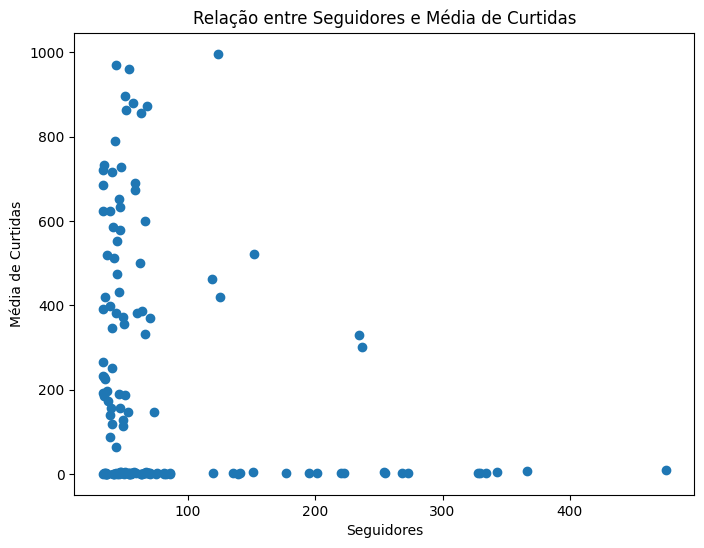

In [25]:
# Relação entre 'followers' e 'avg_likes'
plt.figure(figsize=(8, 6))
plt.scatter(df['followers'], df['avg_likes'])
plt.xlabel('Seguidores')
plt.ylabel('Média de Curtidas')
plt.title('Relação entre Seguidores e Média de Curtidas')
plt.show()

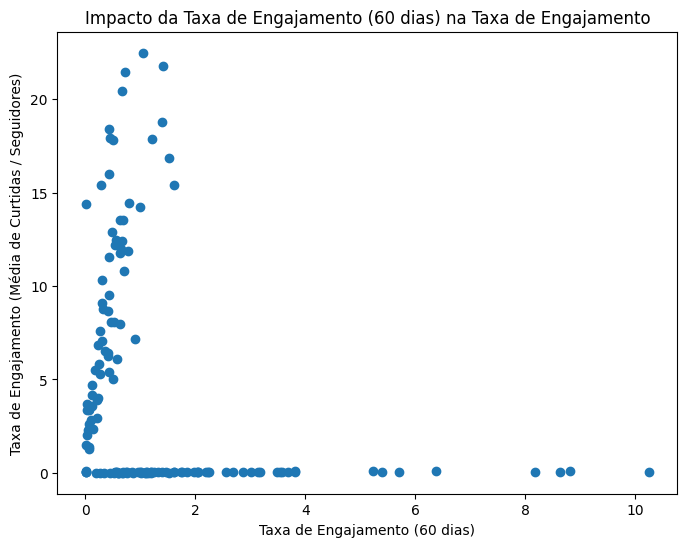

In [26]:
# Impacto de '60_day_eng_rate' na taxa de engajamento ('avg_likes'/'followers')
df['eng_rate'] = df['avg_likes'] / df['followers']
plt.figure(figsize=(8, 6))
plt.scatter(df['60_day_eng_rate'], df['eng_rate'])
plt.xlabel('Taxa de Engajamento (60 dias)')
plt.ylabel('Taxa de Engajamento (Média de Curtidas / Seguidores)')
plt.title('Impacto da Taxa de Engajamento (60 dias) na Taxa de Engajamento')
plt.show()

In [27]:
# Correlação entre 'posts' e 'followers'
correlacao = df['posts'].corr(df['followers'])
print(f"Correlação entre posts e followers: {correlacao}")

Correlação entre posts e followers: 0.047782213135570975


# Separação do Dataset

In [28]:
df

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country_code,eng_rate
0,1,92,3.30,475.8,8.7,1.39,6.5,0.0,3,0.018285
1,2,91,6.90,366.2,8.3,1.62,5.9,0.0,1,0.022665
3,4,93,1.80,342.7,6.2,0.97,3.3,0.0,1,0.018092
4,5,91,6.80,334.1,1.9,0.20,665.3,0.0,1,0.005687
5,6,91,5.60,329.2,3.5,0.88,2.9,0.0,1,0.010632
...,...,...,...,...,...,...,...,...,...,...
195,196,71,2.30,33.2,623.8,1.40,464.7,0.0,1,18.789157
196,197,81,3.80,33.2,390.4,0.64,208.0,0.0,3,11.759036
197,198,79,0.77,33.2,193.3,0.26,82.6,149.2,2,5.822289
198,199,78,2.30,33.0,719.6,1.42,467.7,0.0,1,21.806061


In [29]:
# Separar as variáveis independentes (X) e a variável dependente (y - 'influence_score')
X = df[['country_code', 'posts', 'followers', 'avg_likes', '60_day_eng_rate']]
y = df['influence_score']

In [30]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalização de Dados

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Configurações do Algoritmo: Teste diferentes valores de k e métricas de distância

In [32]:
k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Avaliar o modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'kNN com k={k}: MAE={mae}, MSE={mse}, RMSE={rmse}')

kNN com k=3: MAE=6.404761904761902, MSE=62.38095238095237, RMSE=7.898161329129228
kNN com k=5: MAE=5.835714285714286, MSE=48.80142857142856, RMSE=6.985801927583444
kNN com k=7: MAE=5.663265306122449, MSE=48.43440233236151, RMSE=6.959482906966689
kNN com k=9: MAE=5.083333333333333, MSE=40.22619047619046, RMSE=6.342412039294708


# Otimização de Hiperparâmetros
Realize ajustes no modelo usando GridSearchCV para encontrar os melhores valores de k.

In [33]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Melhores parâmetros: {grid.best_params_}')

Melhores parâmetros: {'n_neighbors': 18}


In [34]:
# Implementar o algoritmo kNN com o melhor valor de k
melhor_k = grid.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors=melhor_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=18)

In [35]:
# Fazer previsões
y_pred = knn.predict(X_test)

# Validação Cruzada

In [36]:
scores = cross_val_score(knn, X, y, cv=5)
print(f'Scores da validação cruzada: {scores}')
print(f'Média dos scores da validação cruzada: {np.mean(scores)}')

Scores da validação cruzada: [-1.94163119 -2.31914093  0.0779832  -0.10265829 -0.24194281]
Média dos scores da validação cruzada: -0.9054780053665867


# Métricas de Avaliação

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 4.6448412698412715
MSE: 29.907297178130523
RMSE: 5.468756456282408


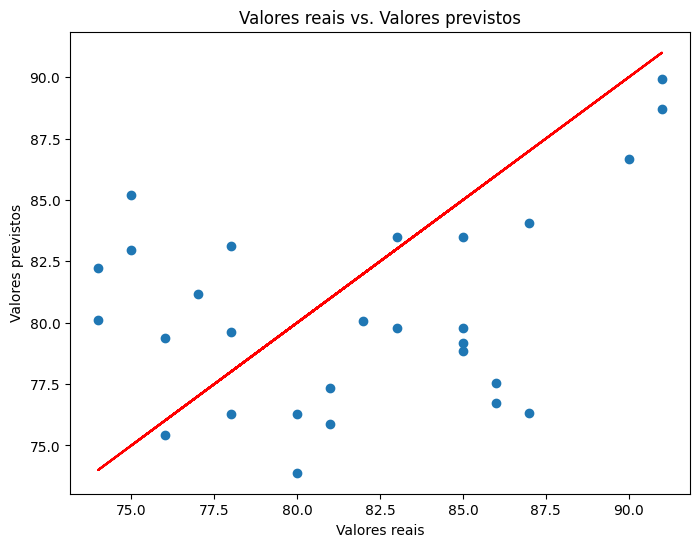

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores reais vs. Valores previstos')

# Adicionar reta
plt.plot(y_test, y_test, color='red')

plt.show()


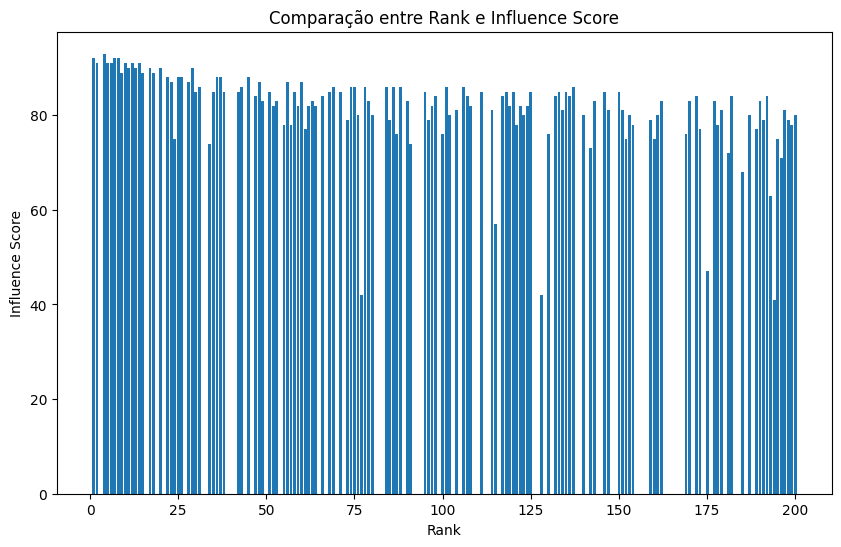

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(df['rank'], df['influence_score'])
plt.xlabel('Rank')
plt.ylabel('Influence Score')
plt.title('Comparação entre Rank e Influence Score')
plt.show()

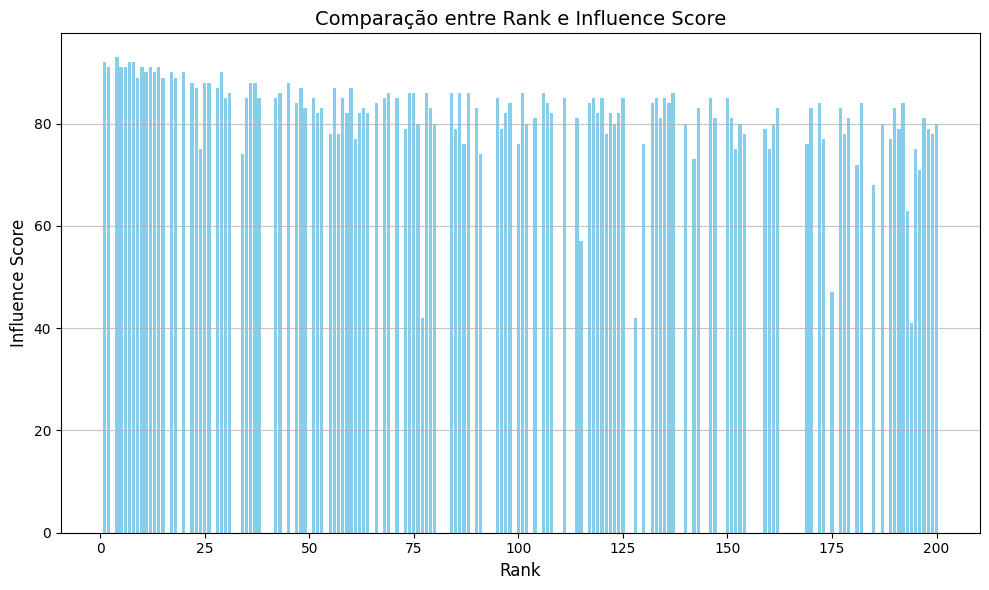

In [43]:
# Ordenar o DataFrame pelo rank para melhor visualização
df_sorted = df.sort_values('rank')

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['rank'], df_sorted['influence_score'], color='skyblue')
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Influence Score', fontsize=12)
plt.title('Comparação entre Rank e Influence Score', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

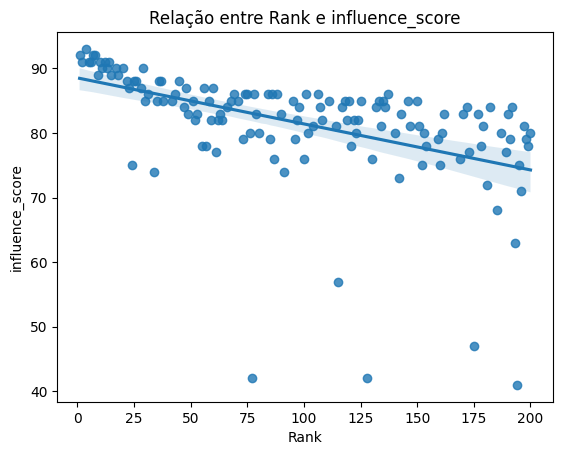

In [50]:
sns.regplot(x='rank', y='influence_score', data=df)

# Adicionar rótulos e título
plt.xlabel('Rank')
plt.ylabel('influence_score')
plt.title('Relação entre Rank e influence_score')

# Exibir o gráfico
plt.show()

# Analisar uma possibilidade de lidar com Asia, Oceania e Africa

In [51]:
df

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country_code,eng_rate
0,1,92,3.30,475.8,8.7,1.39,6.5,0.0,3,0.018285
1,2,91,6.90,366.2,8.3,1.62,5.9,0.0,1,0.022665
3,4,93,1.80,342.7,6.2,0.97,3.3,0.0,1,0.018092
4,5,91,6.80,334.1,1.9,0.20,665.3,0.0,1,0.005687
5,6,91,5.60,329.2,3.5,0.88,2.9,0.0,1,0.010632
...,...,...,...,...,...,...,...,...,...,...
195,196,71,2.30,33.2,623.8,1.40,464.7,0.0,1,18.789157
196,197,81,3.80,33.2,390.4,0.64,208.0,0.0,3,11.759036
197,198,79,0.77,33.2,193.3,0.26,82.6,149.2,2,5.822289
198,199,78,2.30,33.0,719.6,1.42,467.7,0.0,1,21.806061


In [59]:
# Suprimir os avisos do sklearn
warnings.filterwarnings("ignore", category=UserWarning)

for continente in df["country_code"].unique():
    df_continente = df[df["country_code"] == continente]

    # Separar as variáveis independentes (X) e a variável dependente (y - 'influence_score')
    X = df_continente[["posts", "followers", "avg_likes", "60_day_eng_rate"]]
    y = df_continente["influence_score"]

    # Dividir os dados em conjuntos de treinamento e teste
    if len(df_continente) > 1:  # Verificar se há mais de uma amostra
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Normalização de Dados
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Criar os índices para o PredefinedSplit
        test_fold = [-1] * len(X_train) + [0] * len(X_test)
        ps = PredefinedSplit(test_fold)

        # Otimização de Hiperparâmetros com PredefinedSplit
        param_grid = {"n_neighbors": np.arange(1, min(10, len(X_train)))}
        knn = KNeighborsRegressor()
        grid = GridSearchCV(
            knn, param_grid, cv=ps
        )  # Usar PredefinedSplit para validação cruzada
        grid.fit(
            np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test))
        )  # Ajustar o modelo com todos os dados

        # Implementar o algoritmo kNN com o melhor valor de k
        melhor_k = grid.best_params_["n_neighbors"]
        knn = KNeighborsRegressor(n_neighbors=melhor_k)
        knn.fit(X_train, y_train)

        # Fazer previsões
        y_pred = knn.predict(X_test)

        # Avaliar o modelo
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f"Continente {continente}: MAE={mae}, MSE={mse}, RMSE={rmse}")
    else:
        print(
            f"Continente {continente}: Não há dados suficientes para treinar o modelo."
        )

Continente 3: MAE=24.1875, MSE=814.1328125, RMSE=28.5330126782995
Continente 1: MAE=2.3925925925925933, MSE=6.774485596707822, RMSE=2.6027842009486344
Continente 2: MAE=4.25, MSE=27.25, RMSE=5.220153254455275
Continente 7: MAE=3.3333333333333335, MSE=13.407407407407396, RMSE=3.661612678507572
Continente 4: MAE=2.0833333333333357, MSE=5.8611111111111285, RMSE=2.4209731743889953
Continente 5: Não há dados suficientes para treinar o modelo.


# Resultados:

Após a análise dos dados e a implementação do modelo kNN, podemos observar alguns pontos interessantes. Primeiramente, a relação entre o número de seguidores e a média de curtidas por post não se mostrou linear, indicando que o crescimento de um não implica necessariamente no crescimento do outro de forma proporcional.

O impacto da taxa de engajamento em 60 dias na taxa de engajamento geral também não apresentou um padrão claro, sugerindo que a taxa de engajamento recente pode não ser um bom preditor da taxa de engajamento a longo prazo.

É importante notar que a conversão da coluna country para faixas numéricas baseadas em continentes pode ter levado a perda de informação relevante, e a utilização de técnicas como one-hot encoding poderia ser explorada para preservar a informação original dos países.

Além disso, a otimização dos hiperparâmetros do modelo kNN se mostrarou importante para a obtenção de resultados mais precisos.

A análise dos resultados por continente revelou que o modelo teve desempenho variável, o que pode indicar a necessidade de modelos específicos para cada região ou a inclusão de variáveis adicionais que capturem as características de cada continente.

Por fim, a visualização dos resultados através dos gráficos de dispersão e barras permitiu uma melhor compreensão do desempenho do modelo e das relações entre as variáveis, auxiliando na identificação de possíveis melhorias e na formulação de novas hipóteses para futuras análises.



## 👥 Autores e Contribuidores
- Iaquine Santos da Silva: Desenvolvimento do modelo, análise de dados e visualizações.
- Renato Gomez de Sousa: Desenvolvimento do modelo, análise de dados e visualizações.